In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv("../data/processed/clean_orders.csv")
order_items = pd.read_csv("../data/processed/clean_order_items.csv")
customers = pd.read_csv("../data/processed/clean_customers.csv")
products = pd.read_csv("../data/processed/clean_products.csv")

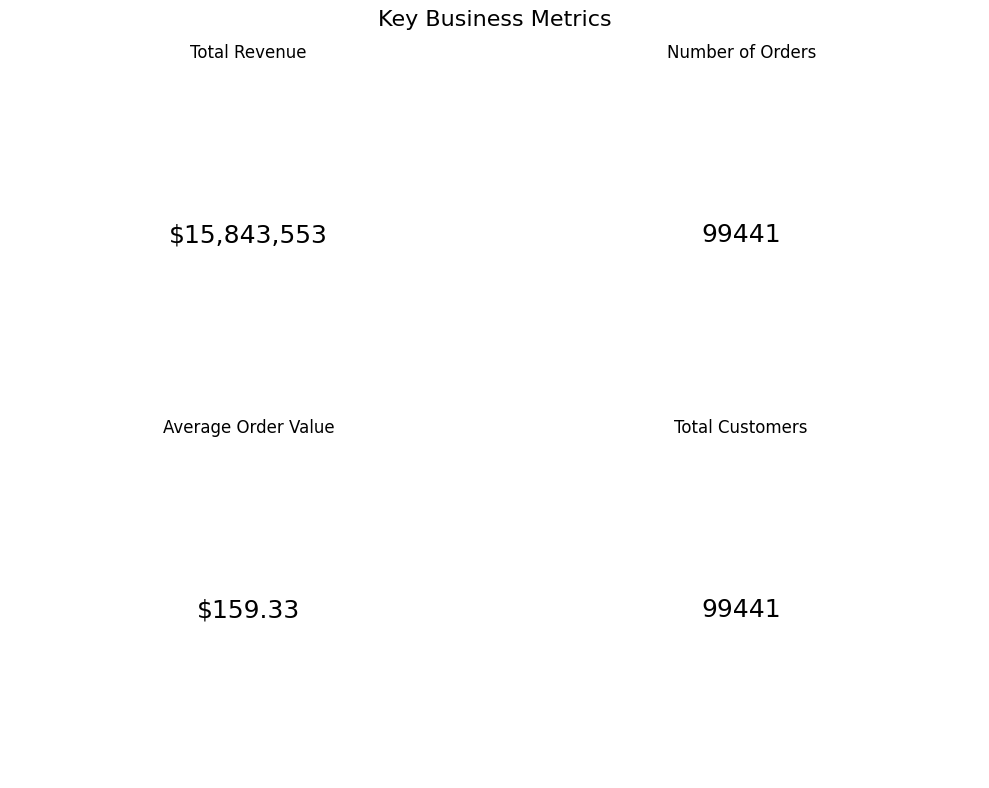

In [17]:
total_revenue = order_items["price"].sum() + order_items["freight_value"].sum()
num_orders = orders["order_id"].nunique()
aov = total_revenue / num_orders
total_customers = customers["customer_id"].nunique()

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
metrics = {
    "Total Revenue": f"${total_revenue:,.0f}",
    "Number of Orders": num_orders,
    "Average Order Value": f"${aov:,.2f}",
    "Total Customers": total_customers,
}

for ax, (title, value) in zip(axes.flatten(), metrics.items()):
    ax.text(0.5, 0.5, value, fontsize=18, ha="center", va="center")
    ax.set_title(title, fontsize=12)
    ax.axis("off")

plt.suptitle("Key Business Metrics", fontsize=16)
plt.tight_layout()
plt.savefig("../output/visualizations/metrics.png", dpi=300)
plt.show()



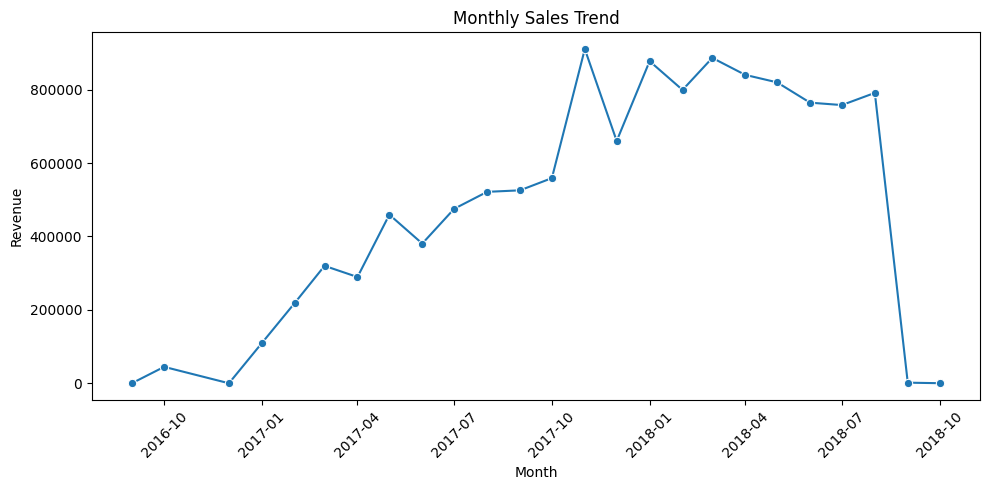

In [16]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
monthly_sales = (
    order_items.groupby(orders["order_purchase_timestamp"].dt.to_period("M"))["price"]
    .sum()
    .reset_index()
)
monthly_sales["order_purchase_timestamp"] = monthly_sales["order_purchase_timestamp"].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x="order_purchase_timestamp", y="price", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../output/visualizations/sales.png", dpi=300)
plt.show()

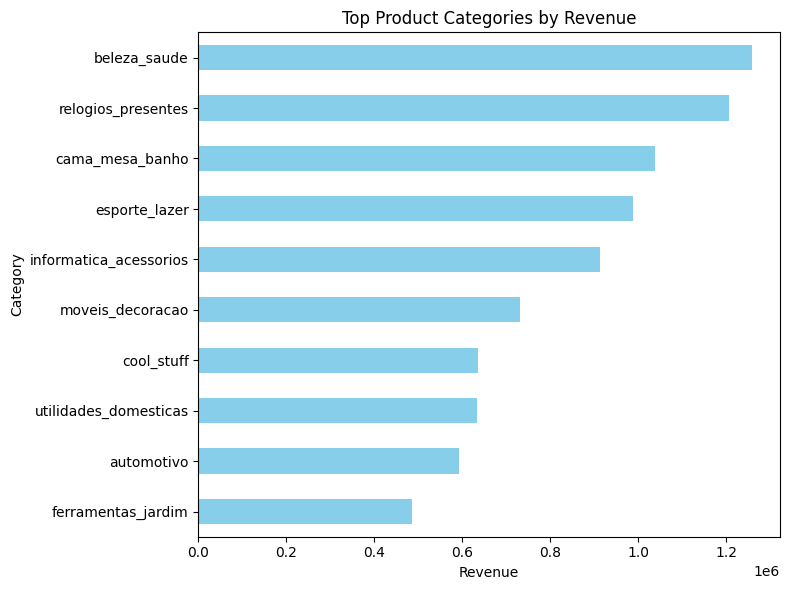

In [15]:
category_sales = (
    order_items.merge(products, on="product_id")
    .groupby("product_category_name")["price"]
    .sum()
    .sort_values(ascending=True)
    .tail(10)  # top 10 categories
)

plt.figure(figsize=(8, 6))
category_sales.plot(kind="barh", color="skyblue")
plt.title("Top Product Categories by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.savefig("../output/visualizations/category_performance.png", dpi=300)
plt.show()

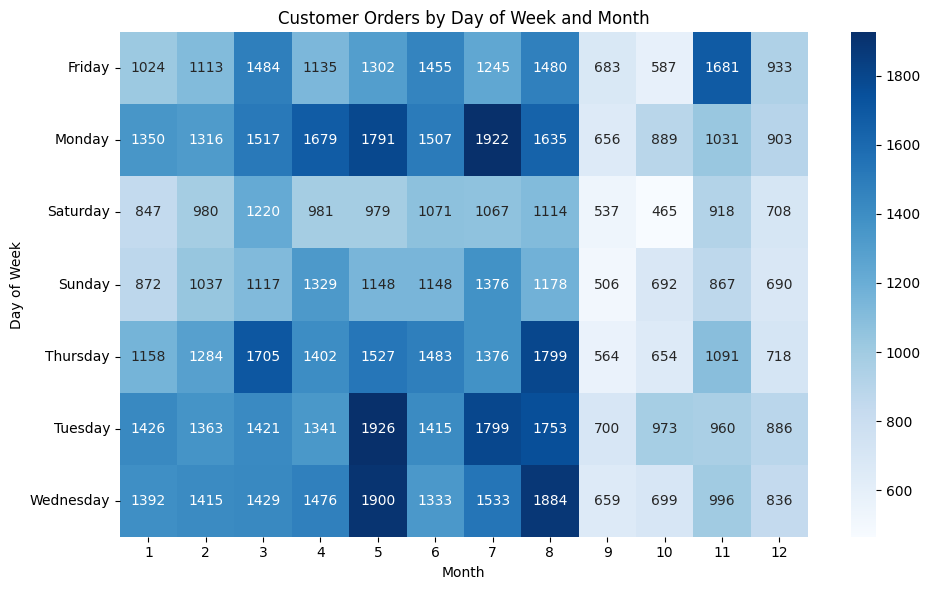

In [14]:
orders["order_month"] = orders["order_purchase_timestamp"].dt.month
orders["order_dayofweek"] = orders["order_purchase_timestamp"].dt.day_name()

heatmap_data = (
    orders.groupby(["order_dayofweek", "order_month"])["order_id"]
    .count()
    .unstack(fill_value=0)
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt="d")
plt.title("Customer Orders by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.savefig("../output/visualizations/customer_heatmap.png", dpi=300)
plt.show()

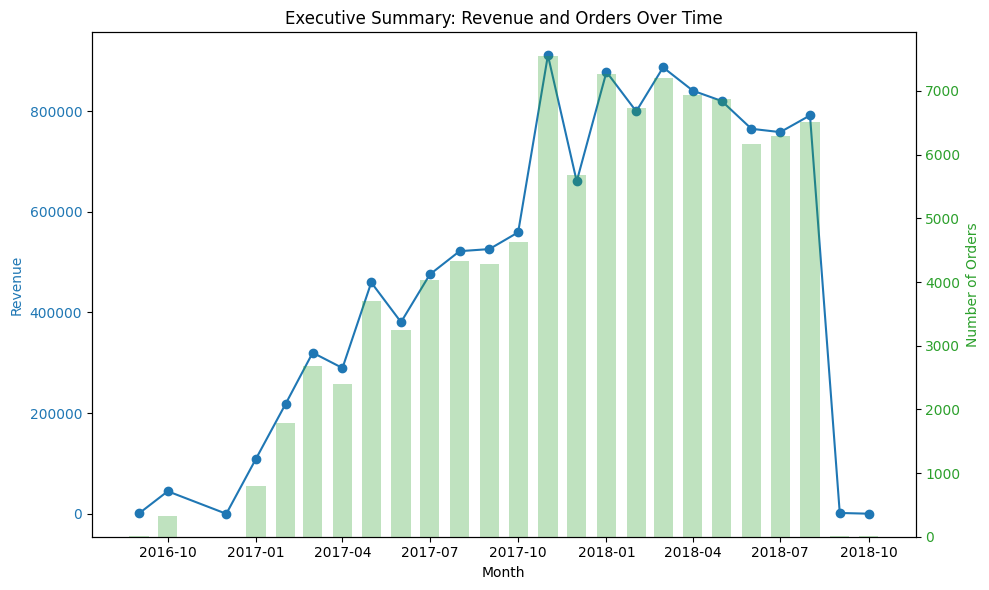

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot revenue on primary y-axis
color = "tab:blue"
ax1.set_xlabel("Month")
ax1.set_ylabel("Revenue", color=color)
ax1.plot(
    monthly_sales["order_purchase_timestamp"],
    monthly_sales["price"],
    marker="o",
    color=color,
    label="Revenue"
)
ax1.tick_params(axis="y", labelcolor=color)

# Plot number of orders on secondary y-axis
ax2 = ax1.twinx()
color = "tab:green"
ax2.bar(
    monthly_orders["order_purchase_timestamp"],
    monthly_orders["order_id"],
    alpha=0.3,
    color=color,
    label="Orders",
    width=20  # makes bars wider (adjust as needed)
)
ax2.set_ylabel("Number of Orders", color=color)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Executive Summary: Revenue and Orders Over Time")
fig.tight_layout()
plt.savefig("../output/visualizations/executive_summary.png", dpi=300)
plt.show()